In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn_som.som import SOM
import pandas as pd 
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
X_test = [[1, 0], [-1, 1], [-1, -1]]
Y_test = [0, 1, 1]
df_test = pd.DataFrame(X_test, columns=['X', 'Y'])
df_test['label'] = Y_test
#Проверочные данные в табличном виде
df_test

,X,Y,label
0,1,0,0
1,-1,1,1
2,-1,-1,1


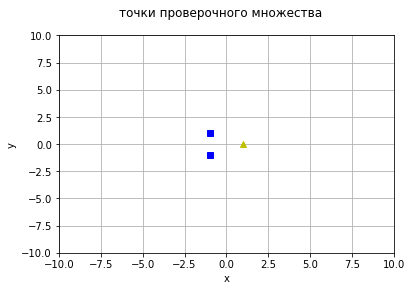

In [3]:
#Отображение проверочных данных
plt.axis([-10, 10, -10, 10])
tmp = X_test[1] + X_test[2]
plt.plot(X_test[0][0], X_test[0][1], 'y^')
plt.plot(tmp[0::2], tmp[1::2], 'bs')
plt.xlabel('x')
plt.ylabel('y')
plt.suptitle('точки проверочного множества')
plt.grid()

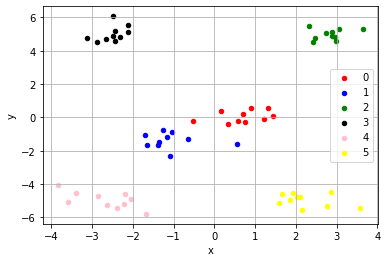

,x,y,label
0,1.425499,0.088877,0
1,0.573480,-0.221950,0
2,0.898531,0.550258,0
3,-0.517568,-0.207281,0
4,0.328456,-0.386587,0
5,0.162397,0.402639,0
6,0.752543,-0.251942,0
7,0.701891,0.187247,0
8,1.206578,-0.091803,0
9,1.325978,0.537335,0


In [4]:
#Обучающие данные
X_train, Y_train = make_blobs(n_samples = [10, 10, 10, 10, 10, 10], centers = [[1,0], [-1, -1], [2.5, 5], [-2.5, 5],
                                                                    [-2.5, -5], [2.5, -5]], cluster_std = 0.5, shuffle = False,
                             random_state = 70)

#Обучающие данные в табличном виде
df = pd.DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=Y_train))
colors = {0:'red', 1:'blue', 2:'green', 3:'black', 4:'pink', 5:'yellow'}
fig, ax = plt.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
ax.grid()
plt.show()

In [8]:
X_test = np.asarray(X_test)
som = SOM(m=6, n=1, dim=2)

som.fit(X_train)

predictions = som.predict(X_train)
df

,x,y,label
0,1.425499,0.088877,0
1,0.573480,-0.221950,0
2,0.898531,0.550258,0
3,-0.517568,-0.207281,0
4,0.328456,-0.386587,0
5,0.162397,0.402639,0
6,0.752543,-0.251942,0
7,0.701891,0.187247,0
8,1.206578,-0.091803,0
9,1.325978,0.537335,0


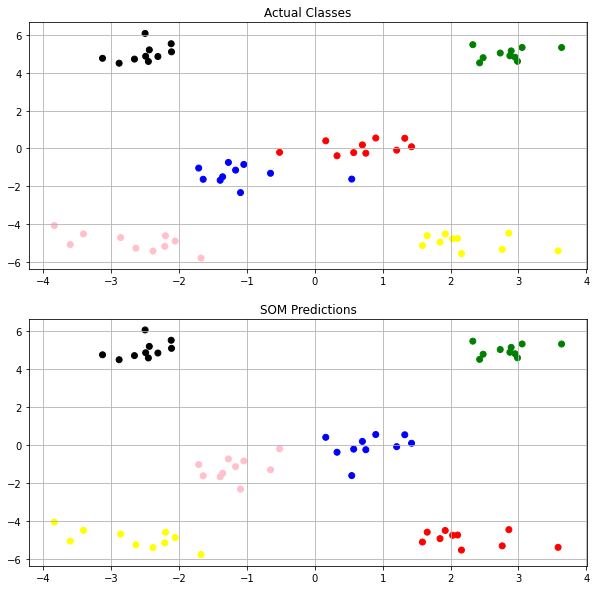

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
x = X_train[:,0]
y = X_train[:,1]
colors = ['red', 'blue', 'green', 'black', 'pink', 'yellow']

ax[0].grid()
ax[0].scatter(x, y, c=Y_train, cmap=ListedColormap(colors))
ax[0].title.set_text('Actual Classes')
ax[1].grid()
ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text('SOM Predictions')

In [7]:
test_predictions = som.predict(X_test)
test_predictions

array([1, 4, 4], dtype=int64)